# Earthquakes and Hydraulic Fracture in Oklahoma

Harvard CS109 final project, submitted December 2015

Kamrine Poels, Eric Fredrickson, Thibaut Perol

# Abstract

Write the abstract

# Table of Contents

* [1. Introduction](#1.-Introduction)
  * [1.1 Our data](#1.1-Our-data)
  * [1.2 Visualization of the earthquakes](#1.2-Visualization-of-the-earthquakes)
  * [1.3 Visualization of the disposal wells](#1.3-Visualization-of-the-disposal-wells)

* [2. Baseline Predictions](#2.-Baseline-Predictions)
    * [2.1 Gutenberg-Richter Law](#2.1-Gutenberg-Richter-Law)
    * [2.2 Time of next earthquake](#2.2-Time-of-next-earthquakes)
    * [2.3 Magnitude of earthquakes](#2.3-Magnitude-of-earthquakes)
    
* [3. Pre- vs. Post- 2010](#3.-Pre-vs.-Post-2010)
    * [3.1 Is the difference statistically significant?](#3.1-Is-the-difference-statistically-significant?)
    * [3.2 Gutenberg-Richter Law Before and After](#3.2-Gutenberg-Richter-Law-Before-and-After)
    * [3.3 Time and Poisson](#3.3-Time and Poisson)

* [4. Regression Models](#4.-Regression-Models)
    * [4.1 Ridge Regression](#4.1-Ridge-Regression)
    * [4.2 Poisson Regression](#4.2-Poisson-Regression)
    * [4.3 Regression With Clusters](#4.3-Regression-With-Clusters)
    
* [5. Conclusion](#5.-Conclusion)

#1. Introduction

### Background

Human-induced earthquakes are becoming an important topic in political and scientific discussions and is now vastly reported by the media. It is well known that surface and underground mining, reservoir depletion, injection and withdrawal of fluids and gas from the subsurface are capable of inducing slip on preexisting faults and potentially earthquakes of various magnitudes. Since 2009, new drilling technologies have given access to oil and gas in previously unproductive geological formations.

### Motivation

The recent increase of small to large earthquake events in central and eastern United States has fueled concern that hydraulic fracturing could be responsible for the increase of the rate of earthquake acitivity. Since 2009, the oil industry has expanded its use of the hydraulic fracturing technique because of the high price of oil that makes the extraction of unconventional oil and gas now economically viable. Microearthquakes (magnitude lower than 2 on the Ritcher magnitude scale, determined from the logarithm of the amplitude of waves recorded by seismographs) are routinely generated as part of the hydraulic fracturing process (fracking) to stimulate oil and gas reservoir. However the currently practiced protocol has low risk of inducing destructive earthquakes. Over the past **100,000 fracking wells drilled**, the **biggest earthquake recorded was of magnitude 3.6**, which is too small to pose serious safety risk.


Nevertheless, the correlation between the increase of fracking and earthquake events has drawn lots of attention from both the scientific community and the media. Ellsworth [2013] claims that some of the seismicity is associated with the increase in saltwater disposal that comes from 'flow-back' water after multistage fracturing operations (see the National Research Council report, *Induced Seismicity Potential in Energy Technologies* [2012]). Once the unconventional oil is extracted, along with the contaminated saltwater, this latter is reinjected into deeper sedimentary geological formations with high porosity and permeability via regulated class II underground injection control (UIC) wells. Sometimes the saline water is reinjected as part of water-flooding enchanced oil recovery. However the large increase of earthquake activity is thought to be associated with the disposal wells.

Since 2009, Oklahoma has been impacted by a significant increase of earthquake events. The exponential increase of the number of earhquakes affects all range of magnitude, from the smallest to the largest earthquake sizes. Furthemore, in this state, the number of saltwater disposal wells have increased dramatically. Sometimes, the sedimentary geological formation used to store the contaminated saltwater is hydraulically connected to the crystalline bedrock. The increase of pore fluid pressure on preexisting fault surfaces in crystalline rocks weakens the fault and can potentially trigger earthquakes. For example several of the largest earthquakes in United States in 2011 and 2012 have been triggered by disposal wells. The **largest was of magnitude 5.6 in Prague, central Oklahoma in 2011** and destroyed 12 homes and injured 2 people. However, only a small fraction of the **30,000 disposal wells** appears to pose safety risk issues. It becomes important to understand the processes of injection-induced seismicity.

In this project, we will examine the question: how well can be predict earthquakes in Oklahoma (the number of earthquakes, time of the next earthquake, magnitude) with the features we have at our disposal?

##1.1 Our data

We collect some data from the Oklahoma Geological Survey on the history of earthquake events localized in Oklahoma state during the past century. From their website, which can be accessed by clicking [here](http://www.okgeosurvey1.gov), we can access an Earthquakes catalog which gives us precious information on the data, location and magnitude of earthquakes. In order to download this catalog we write the following script. Because the catalog is very sparse for the years before the onset of modern seismic recording (1974), we only load the catalog for the years after 1980. It is claimed that the catalog is 'fairly complete to a minimum magnitude of 2.9 from 1980 to present'. A recent report on seismicity in the central and eastern United States found that the probability of missing M ≥ 3 earthquakes in the region has been near zero for decades (“Technical report: Central and eastern United States seismic source characterization for nuclear facilities,” Appendix B (Electric Power Research Institute, Palo Alto, CA; U.S. Department of Energy and U.S. Nuclear Regulatory Commission, Washington, DC; 2012)).

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import json
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
from pyquery import PyQuery as pq
import requests
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import random
import json
import time
import csv
import datetime
import statsmodels.api as sm

In [2]:
# Default plotting
from matplotlib import rcParams

dark_colors = ["#99D699", "#B2B2B2",
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
                (0.4, 0.4, 0.4)]

rcParams['figure.figsize'] = (12, 9)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = "white"
rcParams['axes.titlesize'] = 20      
rcParams['axes.labelsize'] = 17.5
rcParams['xtick.labelsize'] = 15 
rcParams['ytick.labelsize'] = 15
rcParams['legend.fontsize'] = 17.5
rcParams['patch.edgecolor'] = 'none'
rcParams['grid.color']="gray"   
rcParams['grid.linestyle']="-" 
rcParams['grid.linewidth'] = 0.3
rcParams['grid.alpha']=1
rcParams['text.color'] = "444444"
rcParams['axes.labelcolor'] = "444444"
rcParams['ytick.color'] = "444444"
rcParams['xtick.color'] = "444444"

In [3]:
# Create an initial data frame by loading the earthquake
# catalog for year 1980
eq_df = pd.DataFrame()
eq_df = pd.read_csv('http://wichita.ogs.ou.edu/eq/catalog/1980/1980.csv')

# Add the additional years until 2015 included
for year in range(1981,2016):
    url = 'http://wichita.ogs.ou.edu/eq/catalog/' + str(year) + '/' + str(year) + '.csv'
    temp_df = pd.read_csv(url)
    eq_df = eq_df.append(temp_df,ignore_index = True)
# the dataframe is chronologically ordered

    
# add a column with year as a float
# e.g, 1 Jan 2015 is 2015.0 and 31 Dec 2015 is 2015.99
year_float = []
for date in eq_df.origintime.values:
    new_date = time.strptime(date[0:10], "%Y-%m-%d")
    to_add =int(float(new_date.tm_yday)/36.6*100)
    year_float.append(float(str(new_date.tm_year) + '.' + str(to_add)))
eq_df['year_float'] = year_float
    
# Drop the columns we don't want to use because it takes memory
# we do this process in place to avoid copying into an other DataFrame
# drop the error in time and location for now
# drop various other estimations of magnitude
# drop information on body waves and surface waves
eq_df.drop(['err_lon','err_lat','err_depth','err_origintime','mw','mw_src','mblg_usgs','mb','mblg_ogs',
           'ml_ogs', 'ms','mfa','max_mmi','reafile','reamtime','pdlid',
           'mw_ogs'], axis=1, inplace=True)

# Save data frame for future use
eq_df.to_csv('./tempdata/earthquakes_catalog.csv',sep = '|')
eq_df = eq_df[eq_df.prefmag >= 3]
# Load the data frame
# eq_df = pd.DataFrame.from_csv('./tempdata/earthquakes_catalog.csv',sep = '|')

eq_df['year'] = [int(year) for year in eq_df.year_float]

# Show the first 5 earthquakes in the catalog and their features
eq_df.head()

,id,origintime,latitude,longitude,depth,county,origin_src,prefmag,pmag_type,pmag_src,m3hz_ogs,md_ogs,geom,year_float,year
12,267,1980-05-30 07:44:02.72,35.512,-99.390,5.0,ROGER MILLS,OGS,3.0,M3Hz,OGS,3.0,2.5,0101000020E6100000295C8FC2F5D858C0A8C64B3789C1...,1980.412,1980
20,275,1980-07-18 14:29:46.88,35.180,-99.698,5.0,BECKHAM,OGS,3.2,mbLg,OGS,NaN,2.8,0101000020E6100000E9263108ACEC58C0D7A3703D0A97...,1980.546,1980
30,285,1980-11-02 10:00:49.03,35.429,-97.777,7.5,CANADIAN,OGS,3.0,M3Hz,OGS,3.0,2.8,0101000020E61000007D3F355EBA7158C0F4FDD478E9B6...,1980.838,1980
157,412,1982-12-19 05:15:42.94,34.891,-97.584,5.0,MCCLAIN,OGS,3.0,M3Hz,OGS,3.0,2.7,0101000020E61000004C378941606558C0355EBA490C72...,1982.964,1982
212,467,1984-01-24 15:34:09.63,35.033,-96.366,5.0,HUGHES,OGS,3.1,M3Hz,OGS,3.1,2.7,0101000020E61000008195438B6C1758C04E6210583984...,1984.650,1984


We intentionally ignore some of the data relative to body and surface waves as well as other source of estimations of the magnitude to take less space in memory. A complete description of the columns can be found [here](http://www.okgeosurvey1.gov/media/Catalog_Information_/OGS_Reference_Key_for_Earthquake_Catalog_Header_Categories.pdf).
The column that will be used in this study is the recommended magnitude estimation from column prefmag. Here is a description of the columns we kept.

*  id:	Internal	identification	number	assigned	by	the	OGS
*  origintime:	Estimated	date	and	time	of	the	earthquake
*  latitude:	Estimated latitudinal	coordinate	of the	earthquake epicenter
*  longitude:	Estimated Longitudinal	coordinate	of	the	earthquake epicenter
*  depth:	Calculated depth	of	the	earthquake in	kilometers
*  county:	County	within	which	the	earthquake	was	located
*  origin_src:	Source	of	reported	earthquake	location
*  prefmag:	Preferred	magnitude
*  pmag_type: Type	of	magnitude	reported
*  pmag_src: Source	of	reported	magnitude
*  m3hz_ogs: Lg	magnitude	estimate	formerly	used	by	the	OGS
*  md_ogs: Earthquake	duration	magnitude	estimated	by	the	OGS
*  geom: A	well-known	binary	(WKB)	Geographic	Information	System	GIS	format

Note that OGS stands for Oklahoma Geological Survey and USGS for United	States	Geological	Survey.

The water disposal wells data was taken from the [Oklahoma Corporation Commision, Oil and Gas Department](http://www.occeweb.com/og/ogdatafiles2.htm) website. Among the numerous files, we opted for a dataset that contained both the year that the well was reported to the Oil and gas department and the location in coordinates. The downloaded data set, which had many observations with missing features, is in ``wells_reportyear.csv``.

In [4]:
# Read data
#welldf = pd.read_csv('tempdata/wells_reportyear.csv')
# Clean up data
#welldf = welldf[np.isfinite(welldf['YEAR'])]
# Discard extreme coordinates
#welldf = welldf[(welldf.LONGITUDE >= -102.918) & (welldf.LONGITUDE <= -94.466)]
#welldf = welldf[(welldf.LATITUDE >= 33.811) & (welldf.LATITUDE <= 36.99869)]
# Data set contains futuristic years, we discard those observations
#welldf = welldf[welldf.YEAR <= 2015]
# Save data frame for future use
# welldf.to_csv('tempdata/wells_data.csv')
# Load data for future use
welldf = pd.read_csv('tempdata/wells_data.csv')
# Show first 5 wells 
print welldf.shape
welldf.head()

(53389, 11)


,Unnamed: 0,API_COUNTY,API_NUMBER,LEASE_NAME,WELL_NUMBER,latitude,longitude,year,FLUID_TYPE,PACKERDPTH,volume
0,0,3,26,SE EUREKA UNIT-TUCKER #1,21,36.900324,-98.21826,2007,S,4850,9540
1,1,3,26,SE EUREKA UNIT-TUCKER #1,21,36.900324,-98.21826,2008,S,4850,12236
2,2,3,26,SE EUREKA UNIT-TUCKER #1,21,36.900324,-98.21826,2009,S,4850,11825
3,3,3,26,SE EUREKA UNIT-TUCKER #1,21,36.900324,-98.21826,2010,S,4850,11863
4,4,3,163,CHRISTENSEN,1,36.896636,-98.17772,2006,S,4933,34783


We created an interactive visualization tool on the website that can be accessed [here](https://tperol.github.io/cs109-finalproject/).
The first tab maps the distribution of earthquakes in Oklahoma at a given year in red overlayed on the previous earthquakes in green. One can use the slider on the upper right corner to get a sense of the increase of seismic activity during the past 6 years. ** talk about apparent clustering **


##1.2 Visualization of the disposal wells

The data of the disposal wells contains wells dated from 2006 to 2012 with the amount of water disposed underground in gallons.

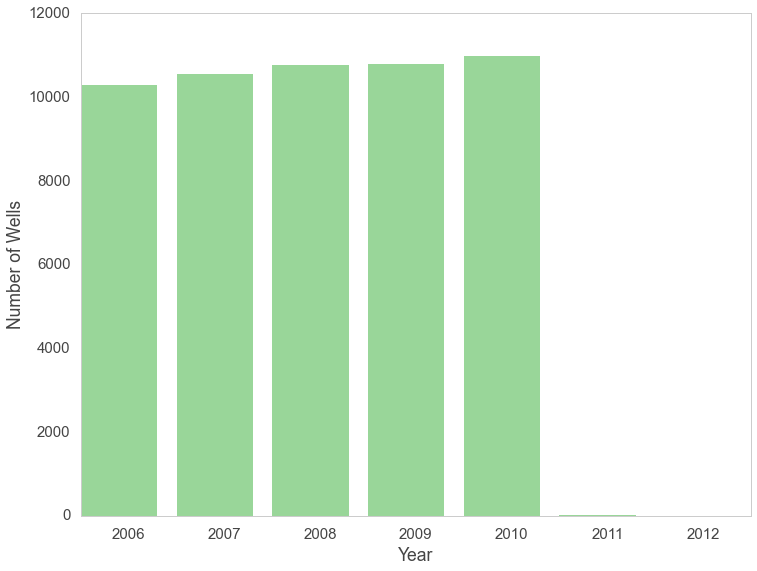

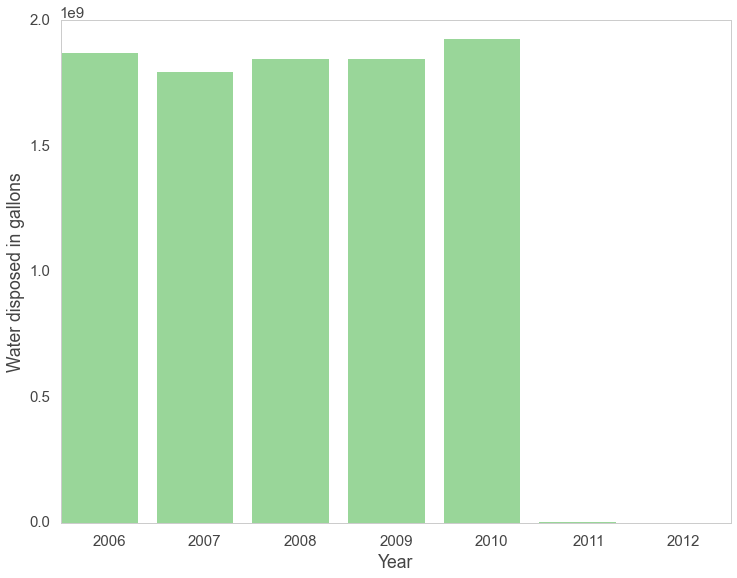

In [5]:
fig, ax = plt.subplots()
plt.bar(np.arange(2006,2013),welldf.groupby('year').count().volume.values, color = "#99D699")
ax.set_xticks(np.arange(2006,2013)+.5)
ax.set_xticklabels(np.arange(2006,2013))
ax.set_xlabel('Year')
ax.set_ylabel('Number of Wells')
ax.grid(False)

fig, ax = plt.subplots()
plt.bar(np.arange(2006,2013),welldf.groupby('year').volume.sum().values, color = "#99D699")
ax.set_xticks(np.arange(2006,2013)+.5)
ax.set_xticklabels(np.arange(2006,2013))
ax.set_xlabel('Year')
ax.set_ylabel('Water disposed in gallons')
ax.grid(False)

In the first plot above, the number of water disposal wells in Oklahoma are plotted by year. In the second plot, the total amount of water gallons disposed is plotted by year. The largest amount of water was disposed between 2006 and 2010. However, we believe that data in the few past years have not been reported or is not currently available to public use.

##1.3 Visualization of the earthquakes

In [69]:
#REQUIRES INSTALLATION conda install basemap
#received assistance from https://peak5390.wordpress.com/2012/12/08/matplotlib-basemap-tutorial-plotting-points-on-a-simple-map/
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

def plot_earthquakes(df):
    map = Basemap(llcrnrlon=int(min(df.longitude))-1, llcrnrlat=int(min(df.latitude))-1,
                  urcrnrlon=int(max(df.longitude))+1, urcrnrlat=int(max(df.latitude))+1)
    map.plot(df.longitude.values, df.latitude.values, 'ro', markersize=2)
    map.drawmapboundary(fill_color='white')
    map.drawcoastlines()
    map.drawstates()
    map.drawcounties()
    plt.plot()
    plt.show()

SyntaxError: invalid syntax (<ipython-input-69-cd5f0378cee4>, line 1)

In [67]:
b42010 = eq_df[(eq_df.year_float<2010)]
plot_earthquakes(b42010[b42010.prefmag>=3])
#plot_earthquakes(eq_df[(eq_df.prefmag>=3)])

NameError: name 'plot_earthquakes' is not defined

We begin with some basic visual inspection of the data. We first plot a histogram of the number of earthquakes by year.


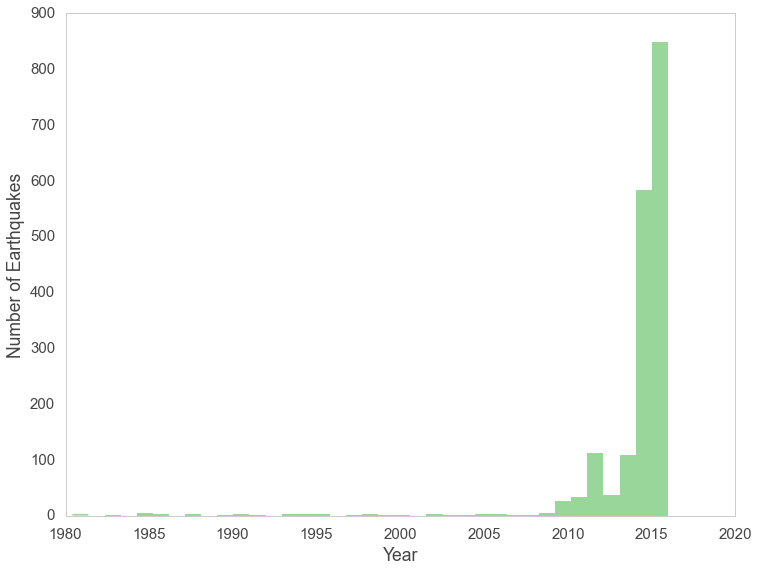

In [6]:
#plot number of earthquakes by year
mask = eq_df['prefmag'] >=3
plt.hist(eq_df[mask]['year_float'].values, bins=2016-1980+1)
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.grid(False)

This visual inspection suggests a clear difference in the number of earthquakes starting around 2010 and since water disposal through wells becomes more intense just a few years earlier makes us suspect an association between the number of earthquakes and fracking activity (specifically, based on past research, the use of disposal wells.)

We further investigate this hypothesis visually. One way of expressing our hypothesis of a difference betwen post-2010 and pre-2010 is as follows. The cumulative number of earthquakes will, of course, increase over time and it is a reasonable first guess to think that it would increase linearly. If there is a real difference between pre-2010 and post-2010, we would expect that fitting lines to the two groups of data separately would produce lines of different slopes.

We investigate this in the visualization below. We fit a line to the pre-2010 data and smooth the points for the post-2010 data. We continue the pre-2010 line in the background for comparison.

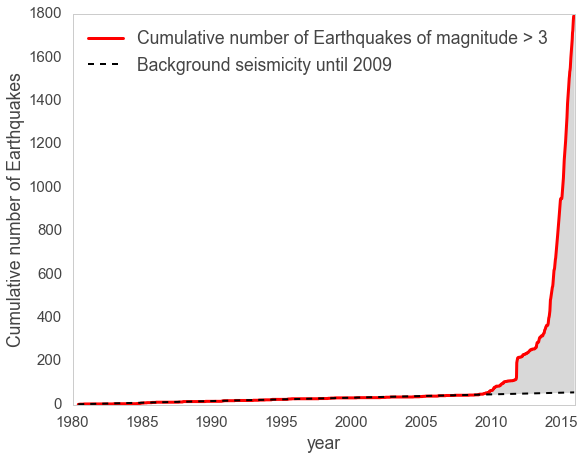

In [7]:
# Source : Walsh, F.R. 
mask = eq_df['prefmag'] >=3
eq_count, base = np.histogram(eq_df[mask]['year_float'], bins = eq_df[mask].shape[0])
# plot the cumulative number of earthquakes of magnitude > 3
plt.figure(figsize = (9,7))
plt.plot(base[:-1], np.cumsum(eq_count), lw=3,c='r', label='Cumulative number of Earthquakes of magnitude > 3' )
mask_time = (eq_df['year_float'] < 2009) & (eq_df['prefmag'] >=3)
eq_2010, base_2010 = np.histogram(eq_df[mask_time]['year_float'], bins = eq_df[mask_time].shape[0])
# fit the earthquake count before 2009 with a 1st order polynomial
# this is the background seismicity rate
fit = np.polyfit(base_2010[:-1],np.cumsum(eq_2010),1)
fit_fn = np.poly1d(fit)
plt.plot(base[:-1],fit_fn(base[:-1]),'k--',label = 'Background seismicity until 2009')
# now fill in between
plt.fill_between(base[:-1], np.cumsum(eq_count), fit_fn(base[:-1]), color='grey', alpha = 0.3);
plt.xlim([1980,2016]);
plt.ylabel('Cumulative number of Earthquakes')
plt.xlabel('year')
plt.legend(loc =2);
plt.grid(False)

The visualization indeed suggests that the line for the pre-2010 data does not fit the post-2010 data very well.

Since this is just a visual inspection, we test the hypothesis in [part 3](#3.-Pre-vs.-Post-2010).

#2. Baseline Predictions

##2.1 Gutenberg-Richter Law

The relationship between earthquake magnitude and frequency can be modeled by the [Gutenberg-Richter law](https://en.wikipedia.org/wiki/Gutenberg–Richter_law):

$$\log_{10}N =a-bM$$

where

- $N$ is the number of earthquakes with magnitude $\geq M$.
- $a$ and $b$ are constants

Typically in seismically active regions, the constant $b$ is equal to 1. The constant $a$ carries little scientific information. This power law relationship between event magnitude and frequency of occurrence is remarkably common, although the values of a and b may vary from region to region or over time. We model the seismic activity in Oklahoma before and after 2010. 

In [8]:
# Function is taken and modified from: 
# http://eqrm.googlecode.com/svn-history/r143/trunk/preprocessing/recurrence_from_catalog.py
def calc_recurrence(df, min_mag = None, max_mag = None, interval = 0.1):
    """
    This function reads an earthquake catalogue file and calculates the
    Gutenberg-Richter recurrence parameters using both least squares and
    maximum likelihood (Aki 1965) approaches.

    Results are plotted for both straightline fits and bounded
    Gutenberg-Richter curves. Also plotted is the curve that would result
    assuming a b-value of 1.

    Funtion arguments:

        df: data frame containing earthquake catalog with columns prefmag for 
                magnitude and year_float for year
        min_mag: minimum magnitude for which data will be used - i.e. catalogue
                completeness
        max_mag: maximum magnitude used in bounded G-R curve. If not specified,
                defined as the maximum magnitude in the catlogue + 0.1 magnitude
                units.
        interval: Width of magnitude bins for generating cumulative histogram
                of earthquake recurrence. Default avlue 0.1 magnitude units.  
    
    """
    magnitudes = df.prefmag.values
    years = df.year_float.values
    
    ###########################################################################
    # Read data
    ###########################################################################
    
    # If maximum magnitude is not specified default value to maximum in catalogue
    if max_mag is not None:
        pass
    else:
        max_mag = magnitudes.max() + 0.1
        
    if min_mag is not None:
        pass
    else:
        min_mag = magnitudes.min()

    num_eq = len(magnitudes)
    print 'Minimum magnitude:', min_mag
    print 'Total number of earthquakes:', num_eq
    num_years = years.max()-years.min()
    annual_num_eq = num_eq/num_years
    print 'Annual number of earthquakes greater than Mw', min_mag,':', \
    annual_num_eq
    print 'Maximum catalog magnitude:', magnitudes.max()
    print 'Mmax = ', max_mag
    max_mag_bin = magnitudes.max() + 0.15
    
    # Magnitude bins
    bins = np.arange(min_mag, max_mag_bin, interval)
    # Magnitude bins for plotting - we will re-arrange bins later
    plot_bins = np.arange(min_mag, max_mag, interval)

    ###########################################################################
    # Generate distribution
    ###########################################################################
    # Generate histogram
    hist = np.histogram(magnitudes,bins=bins)

    # Reverse array order
    hist = hist[0][::-1]
    bins = bins[::-1]

    # Calculate cumulative sum
    cum_hist = hist.cumsum()
    # Ensure bins have the same length has the cumulative histogram.
    # Remove the upper bound for the highest interval.
    bins = bins[1:]

    # Get annual rate
    cum_annual_rate = cum_hist/num_years

    new_cum_annual_rate = []
    for i in cum_annual_rate:
        new_cum_annual_rate.append(i+1e-20)

    # Take logarithm
    log_cum_sum = np.log10(new_cum_annual_rate)
    
    ###########################################################################
    # Fit a and b parameters using a varity of methods
    ###########################################################################
    
    # Fit a least squares curve
    b,a = np.polyfit(bins, log_cum_sum, 1)
    print 'Least Squares: b value', -1. * b, 'a value', a
    alpha = np.log(10) * a
    beta = -1.0 * np.log(10) * b

    # Maximum Likelihood Estimator fitting
    # b value
    b_mle = np.log10(np.exp(1)) / (np.mean(magnitudes) - min_mag)
    beta_mle = np.log(10) * b_mle
    print 'Maximum Likelihood: b value', b_mle


    ###########################################################################
    # Generate data to plot results
    ###########################################################################

    # Generate data to plot least squares linear curve
    # Calculate y-intercept for least squares solution
    yintercept = log_cum_sum[-1] - b * min_mag
    ls_fit = b * plot_bins + yintercept
    log_ls_fit = []
    for value in ls_fit:
        log_ls_fit.append(np.power(10,value))

    # Generate data to plot bounded Gutenberg-Richter for LS solution
    numer = np.exp(-1. * beta * (plot_bins - min_mag)) - \
            np.exp(-1. *beta * (max_mag - min_mag))
    denom = 1. - np.exp(-1. * beta * (max_mag - min_mag))
    ls_bounded = annual_num_eq * (numer / denom)
        
    # Generate data to plot maximum likelihood linear curve
    mle_fit = -1.0 * b_mle * plot_bins + 1.0 * b_mle * min_mag + np.log10(annual_num_eq)
    log_mle_fit = []
    for value in mle_fit:
        log_mle_fit.append(np.power(10,value))

    # Generate data to plot bounded Gutenberg-Richter for MLE solution
    numer = np.exp(-1. * beta_mle * (plot_bins - min_mag)) - \
            np.exp(-1. *beta_mle * (max_mag - min_mag))
    denom = 1. - np.exp(-1. * beta_mle * (max_mag - min_mag))
    mle_bounded = annual_num_eq * (numer / denom)

    # Compare b-value of 1
    fit_data = -1.0 * plot_bins + min_mag + np.log10(annual_num_eq)
    log_fit_data = []
    for value in fit_data:
        log_fit_data.append(np.power(10,value))

    ###########################################################################
    # Plot the results
    ###########################################################################

    # Plotting
    fig = plt.figure(1)
    ax = fig.add_subplot(111)
    plt.scatter(bins, new_cum_annual_rate, label = 'Catalogue')
    ax.plot(plot_bins, log_ls_fit, c = 'r', label = 'Least Squares')
    ax.plot(plot_bins, ls_bounded, c = 'r', linestyle ='--', label = 'Least Squares Bounded')
    ax.plot(plot_bins, log_mle_fit, c = 'g', label = 'Maximum Likelihood')
    ax.plot(plot_bins, mle_bounded, c = 'g', linestyle ='--', label = 'Maximum Likelihood Bounded')
    ax.plot(plot_bins, log_fit_data, c = 'b', label = 'b = 1')
    
    #ax.plot(bins, ls_fit2, c = 'k')
    ax.set_yscale('log')
    ax.legend(loc = 3)
    ax.set_ylim([min(new_cum_annual_rate) * 0.1, max(new_cum_annual_rate) * 10.])
    ax.set_xlim([min_mag - 0.5, max_mag + 0.5])
    ax.set_ylabel('Annual probability')
    ax.set_xlabel('Magnitude')
    ax.grid(False)

Minimum magnitude: 3.0
Total number of earthquakes: 1798
Annual number of earthquakes greater than Mw 3.0 : 50.55105713
Maximum catalog magnitude: 5.6
Mmax =  5.7
Least Squares: b value 2.67090565408 a value 10.6859471966
Maximum Likelihood: b value 1.53622167708


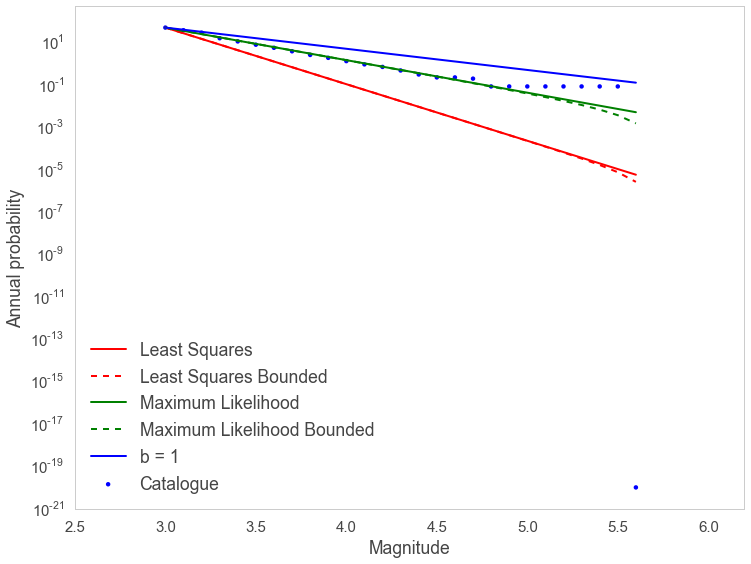

In [9]:
# Plot for all dataset
calc_recurrence(eq_df)

The constant $b$ is calculated by using least squares and maximum likelihood. The calculated value of $b$ is 1.53, which means there are more earthquakes of lower magnitude than higher magnitude.

##2.2 Time of Next Earthquake

There are reasons to believe that the number of earthquakes per year, hour, other unit of time can be approximated fairly well by a Poisson distribution, specifically that Q~Pois( $\lambda t$) where Q is the number of earthquakes, t is some unit of time, and $ \lambda $ is a rate parameter. The reasons for this as follows.

The Binomial distribution describes the total number of "successes" out of n trials with a probability of success p. The Poisson distribution arises as n goes to infinite and p goes to 0 while np remains constant. Thus, it is a good approximation when there are many, many trials, but the probability of success is quite local for any given trial. Thus, the Poisson distribution is likely a good approximation for earthquakes. For a given year, hour, etc. there is a low probability that any particular very small region in oklahoma will experience a magnitude>3 earthquake. However, there are many very small regions in Oklahoma.

It can be further shown that if Q~Pois$(\lambda* t)$, D~Expo($\lambda$) where D is the amount of time between any two successive earthquakes.

Thus, as an initial baseline, we plot the amount of time between earthquakes for the whole state of Oklahoma and see how well it can be modelled with an exponential distribution.

In [12]:
import datetime
#function to create list of interarrival times in hours from df 
def get_hours_between(df):
    dates=[]
    origintimes = df.origintime.values
    for date in origintimes:
        year, month, day = date.split('-')
        day, hour = day.split(' ')
        hour, minute, second = hour.split(':')
        if len(second.split('.'))==2:
            second, microsecond = second.split('.')
        elif len(second.split('.'))==1:
            microsecond=0
        dates.append(datetime.datetime(int(year), int(month), int(day), int(hour), int(minute), 
                                       int(second), int(microsecond)))
    dates=sorted(dates)
    deltas=[]
    for i in range(1,len(dates)):
        delta = dates[i] - dates[i-1]
        delta = delta.total_seconds()/3600
        deltas.append(delta)
    deltas = np.array(deltas)
    return deltas

In [13]:
deltas = get_hours_between(eq_df[eq_df.prefmag>=3])

In [19]:
#http://statsmodels.sourceforge.net/devel/generated/statsmodels.graphics.gofplots.ProbPlot.html
#fit and plot exponential to data
def fit_expo(deltas, plot=True, bins=100, xmax=100, ymax=0.02, k=1., force_lambd=None, summary_stats=True):
    #If we are inherting a previous model for comparison, use previous lambda
    if pd.notnull(force_lambd):
        #Calculate Summary Statistics
        lambd=force_lambd
        mean = np.mean(deltas) #sample mean
 
    #If we are fitting the model on this dataset separately, calculate lambda from data
    elif pd.isnull(force_lambd):
        #Use Maxmimum Likelihood Estimator to get exponential fit
        expo_fit = sp.stats.expon.fit(deltas, floc=0)
        #Calculate Summary Statistics
        lambd = expo_fit[1] #fitted mean
        #mean = lambd
        
    #Calculate more summary statistics
    k=float(k)
    n = float(len(deltas))
    ssr = np.sum((deltas-lambd)**2)
    aic = n*np.log(ssr/n) + 2*k
    mse = np.mean((deltas-lambd)**2)  
        
    if plot==True:
        #Overlay fitted exponential over histogram
        f, axes = plt.subplots(nrows=int(1), ncols=int(2), squeeze=False)
        f.set_figheight(8)
        f.set_figwidth(18)
        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)
        axes[0][0].hist(deltas, bins=bins, normed=True, zorder=0, color='grey', 
                        label='Hours')
        x = np.arange(0,xmax,0.01)
        y = sp.stats.expon.pdf(x, scale=lambd)
        axes[0][0].grid(False) 
        axes[0][0].plot(x,y, color='green', zorder=10, label='Exponential PDF')
        axes[0][0].set_xlim(0,xmax)
        axes[0][0].set_ylim(0,ymax)
        axes[0][0].legend()
        axes[0][0].set_title('Hours Between Quakes')
        #QQ Plot for fit to exponential
        ppstats = sm.ProbPlot(deltas, sp.stats.expon, loc=0, scale=lambd)
        
        #Calculate one more summary statistic
        t_quants = ppstats.theoretical_quantiles #x
        s_quants = ppstats.sample_quantiles #y
        y_fit = t_quants
        qq_ssr = np.sum((s_quants-y_fit)**2)
        qq_sst = np.sum((s_quants-np.mean(s_quants))**2)
        qq_r2 = 1-(qq_ssr/qq_sst)
        
        #Another plot
        #QQ's
        axes[0][1].scatter(t_quants,s_quants, marker='o', color='green')
        #45 degree reference line
        x = np.arange(0,20000, 1.)
        y = x
        axes[0][1].plot(x,y, color='gray')
        axes[0][1].grid(False)
        axes[0][1].set_xlim(0,20000)
        axes[0][1].set_ylim(0,20000)
        axes[0][1].set_title('QQ Plot')
        
        
    #Print Summary Statistics
    if summary_stats==True:
        print "Summary Statistics for Distributional Fit"
        print "lambda = " + str(lambd)
        if pd.notnull(force_lambd):
            print "sample mean = " + str(mean)
        print "sample size = " + str(n)
        print "AIC = " + str(aic) 
        print "QQ R^2 = " + str(qq_r2)
        print "Summary Statistics for Prediction"
        print "MSE = " + str(mse)
        
    return(lambd, n, aic, k, mse, qq_r2, t_quants, s_quants)

Summary Statistics for Distributional Fit
lambda = 178.25892174
sample size = 1795.0
AIC = 25463.7066505
QQ R^2 = 0.145376307016
Summary Statistics for Prediction
MSE = 1446698.74532


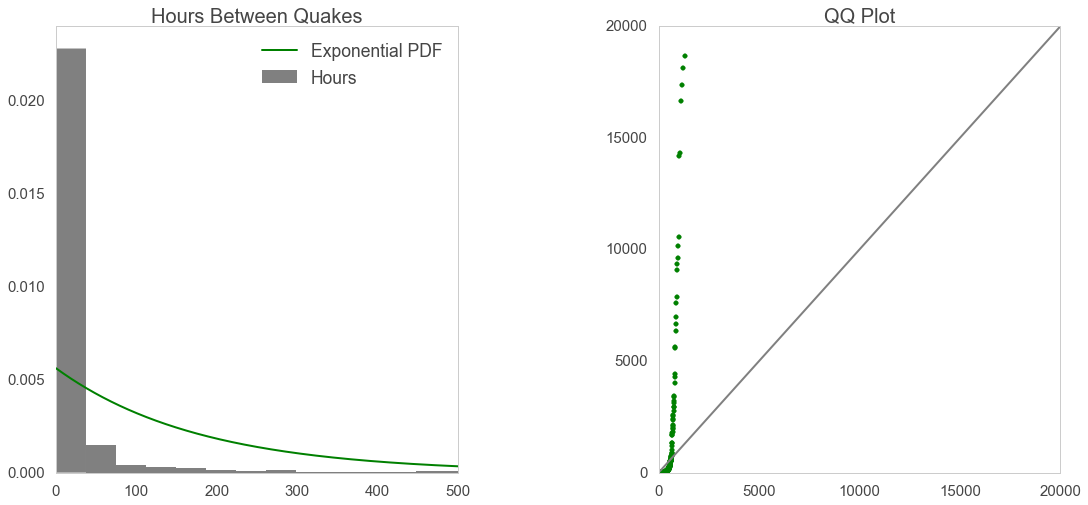

In [20]:
deltas1 = get_hours_between(eq_df[eq_df.prefmag>=3])
summary1 = fit_expo(deltas1, plot=True, bins=500, xmax=500, ymax=0.024, k=1., 
                    force_lambd=None, summary_stats=True)

The above plot shows that the fit is not too good. The exponential curve like the histogram does decrease at an increasing rate, but overall the curve does not fit too well. Further the QQ Plot shows that the data does not appear to be well approximated by an exponential distribution.

#3. Pre vs. Post 2010

In [11]:
# Separate the data by time period
pre2010 = eq_df[eq_df.year_float <= 2010]
post2010 =  eq_df[eq_df.year_float > 2010]

##3.1 Is the difference statistically significant?

The first test that we perform is a two sample t-test that compares the number of earthquakes per year. Our null hypothesis is that the number of events per year before 2010 is equal to that after 2010. The alternative is that the median number of earthquakes per year after 2010 is greater than that before 2010.

We perform a tow sample Welch’s t-test on the log of the number of earthquakes since our data is severely skewed to the right:

[<matplotlib.text.Text at 0x10dca04d0>, <matplotlib.text.Text at 0x10dc9f590>]

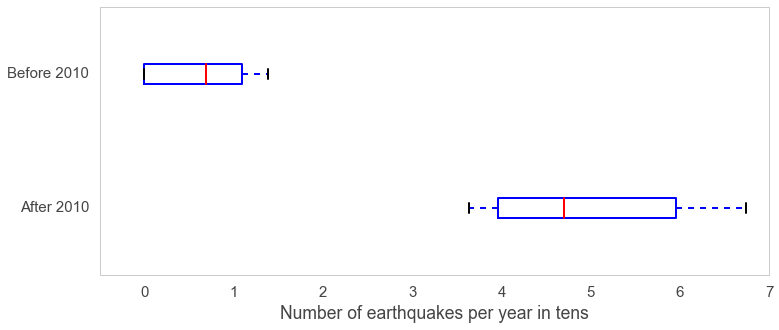

In [13]:
eq_df_priorByYear = pre2010.groupby('year').count().reset_index().prefmag
eq_df_postByYear = post2010.groupby('year').count().reset_index().prefmag
# Plot samples to see distribution
fig, ax = plt.subplots()
data = [np.log(eq_df_postByYear), np.log(eq_df_priorByYear)]
plt.boxplot(data,vert=0, )
plt.grid(False)
ax.set_aspect(1.5)
ax.set_xlim([-.5, 7])
ax.set_xlabel('Number of earthquakes per year in tens')
ax.set_yticks([1,2])
ax.set_yticklabels(['After 2010','Before 2010'])

In [6]:
# Perform t-test (Welch’s t-test)
# Null hypothesis: number of earthquakes per year are the same in both time periods
# Alternative hypothesis: number of earthquakes per year are NOT the same between time periods
t_test = sp.stats.ttest_ind(np.log(eq_df_priorByYear), np.log(eq_df_postByYear), equal_var=False)
t_test

(-7.5948840227784533, 0.00031718210578319606)

With a p-value of .0003, we reject the null hypothesis and conclude that the medians differ. In addition, we perform a permutation test with replacement in case the log-transformed data does not follow a normal distribution:

0.00015


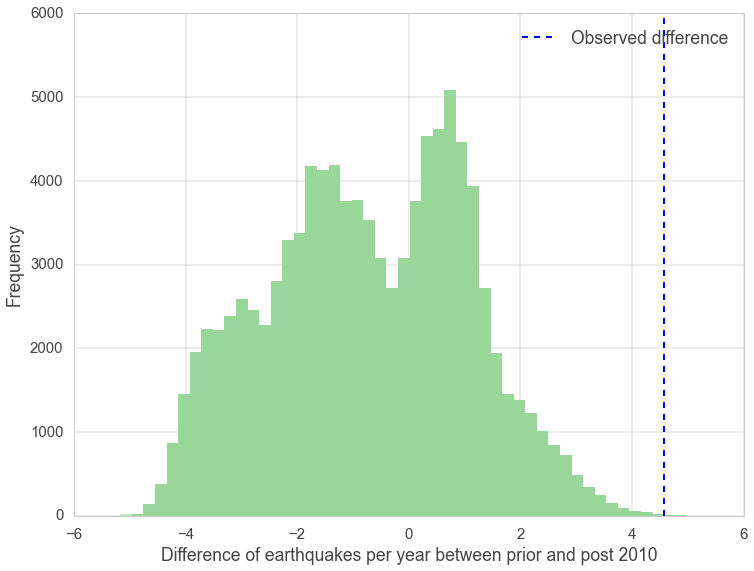

In [8]:
# Prepare data
alleq_df_ByYear = eq_df.groupby('year').count().reset_index().prefmag
n = len(eq_df_postByYear)
N = len(eq_df.groupby('year').count().reset_index().prefmag)
# Get observed difference
obsdiff = np.log(eq_df_postByYear.mean())-np.log(eq_df_priorByYear.mean())

# Start list vector for storing difference of means
mediff = []

# Run permutations
for i in range(100000):
    post = np.random.choice(alleq_df_ByYear.values, size = n, replace = True)
    prior = np.random.choice(alleq_df_ByYear.values, size = N-n, replace = True)
    mediff.append(np.log(post.mean())-np.log(prior.mean()))
    

# Plot results
plt.hist(mediff, bins = 50)
plt.axvline(obsdiff, color='b', linestyle='dashed', linewidth=2, label = 'Observed difference')
plt.xlabel('Difference of earthquakes per year between prior and post 2010')
plt.ylabel('Frequency')
plt.legend()
# Get p.value
count = 0
for diff in mediff:
    if diff > obsdiff:
        count += 1
print count/100000.

With a p-value of 0.00015, we reject the null hypothesis and conclude the same as before.

##3.2 Gutenberg-Richter Law Before and After

We apply the Gutenberg-Richter law again to our data but this time with the data separated into events prior to 2010 and after 2010. The goal of this application is to observe the difference of the relationship between frequency and magnitude from these time periods.

Minimum magnitude: 3.0
Total number of earthquakes: 65
Annual number of earthquakes greater than Mw 3.0 : 2.19928946033
Maximum catalog magnitude: 4.2
Mmax =  4.3
Least Squares: b value 7.68281591362 a value 25.6639063792
Maximum Likelihood: b value 1.50155007041


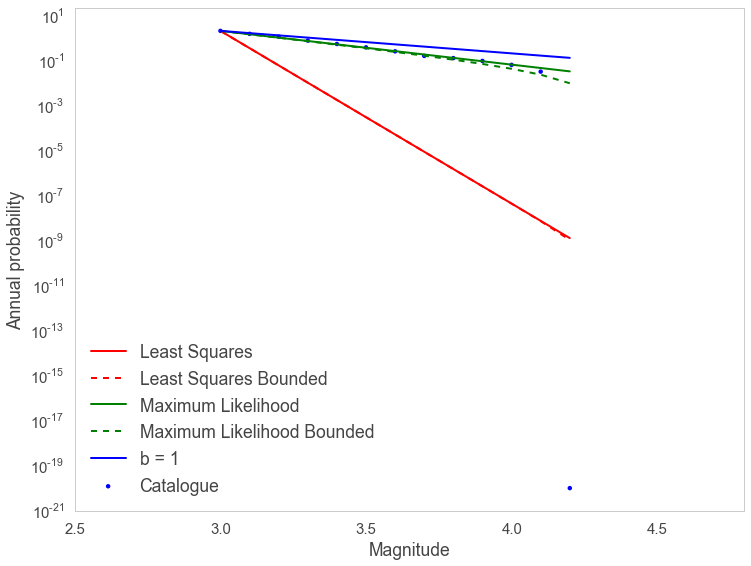

In [17]:
calc_recurrence(pre2010)

Minimum magnitude: 3.0
Total number of earthquakes: 1733
Annual number of earthquakes greater than Mw 3.0 : 295.733788396
Maximum catalog magnitude: 5.6
Mmax =  5.7
Least Squares: b value 2.72355393901 a value 11.6587421899
Maximum Likelihood: b value 1.53755329344


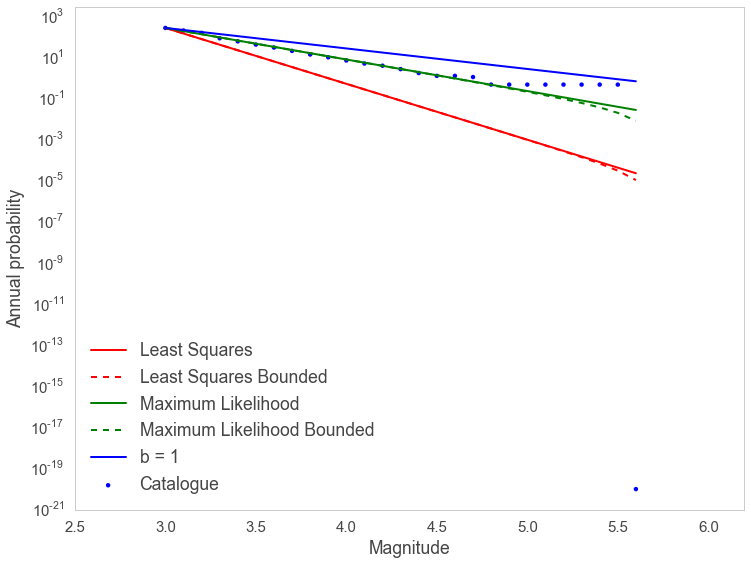

In [18]:
calc_recurrence(post2010)

The $b$ value after 2010 is smaller than that prior to 2010, suggesting a smaller ratio of eathquakes of large magnitude to lower magnitude after 2010 than usual. However, after 2010 there are 295 annual earthquakes with magnitude greater than 3 while there were only 2 prior to 2010 annually. 

##3.3 Time and Poisson

Summary Statistics for Distributional Fit
lambda = 178.25892174
sample mean = 4048.45867622
sample size = 64.0
AIC = 1121.6150237
QQ R^2 = -0.547956611119
Summary Statistics for Prediction
MSE = 39585947.2289


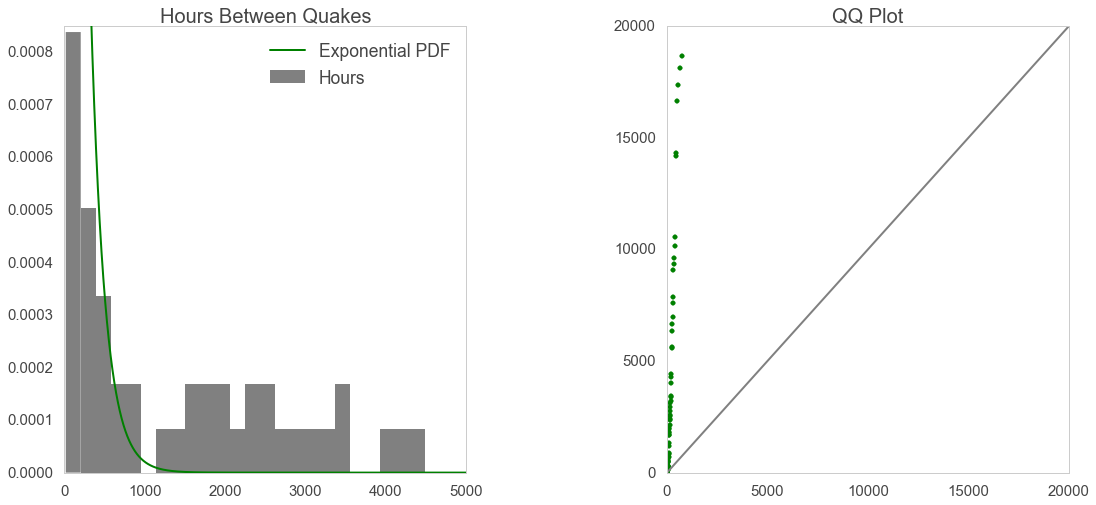

In [29]:
deltas2 = get_hours_between(eq_df[(eq_df.prefmag>=3) & (eq_df.year_float<2010)])
summary2 = fit_expo(deltas2, plot=True, bins=100, xmax=5000, ymax=0.00085, k=1., force_lambd=summary1[0], summary_stats=True)

Summary Statistics for Distributional Fit
lambda = 4048.4588911
sample size = 64.0
AIC = 1093.18796011
QQ R^2 = 0.905764485456
Summary Statistics for Prediction
MSE = 24607501.0894


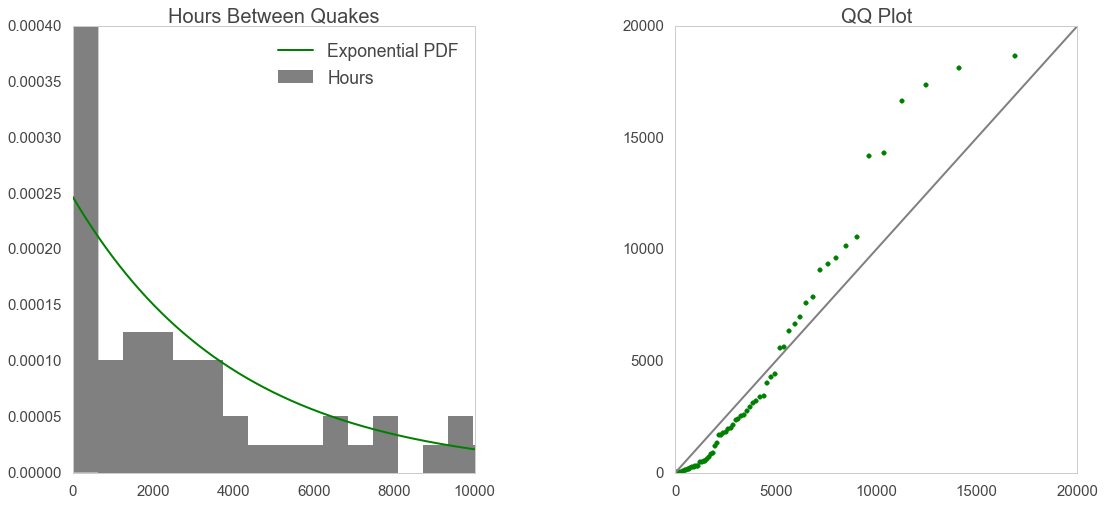

In [28]:
summary3 = fit_expo(deltas2, plot=True, bins=30, xmax=10000, ymax=0.0004, k=2., force_lambd=None, summary_stats=True)

In [26]:
eq_df[eq_df.year_float<2010].shape

(65, 14)

#4. Regression Models

##4.1 Linear Regression

##4.1 Ridge Regression

##4.2 Poisson Regression

##4.3 Regression With Clusters

#5. Conclusion